# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as dg
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# <font color='red'>Read Data</font>

In [2]:
file=pd.read_csv("medicines_unclean.csv")
file

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
177,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
178,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434


# <font color='red'>Data Cleaning</font>

In [3]:
print(file.shape)
file=file.drop_duplicates()
file.shape

(180, 13)


(174, 13)

In [4]:
print(file.isnull().any())
file.isnull().sum()

Alcohol                  True
Malic_Acid              False
Ash                      True
Ash_Alcanity            False
Magnesium                True
Total_Phenols            True
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins          True
Color_Intensity         False
Hue                     False
OD280                    True
Proline                 False
dtype: bool


Alcohol                 1
Malic_Acid              0
Ash                     1
Ash_Alcanity            0
Magnesium               1
Total_Phenols           1
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         1
Color_Intensity         0
Hue                     0
OD280                   1
Proline                 0
dtype: int64

In [5]:
def clean (file):
    n=int(input("Enter 1: fill missing value with mean\nEnter 2: fill missing value with number you choose it\nEnter 3: drop the row containing a missing value"))
    if n==1: #fill missing value with mean
        for i in range (0,file.shape[1]):
            mean=file.iloc[:,i].mean()
            file.iloc[:,i] = file.iloc[:,i].fillna(mean)
    elif n==2: #fill missing value with number you choose it
        nn=float(input("enter the number"))
        file = file.fillna(nn)
    elif n==3: #drop the row containing a missing value1
        file = file.dropna()
    else:
        print("not defined")
    return file   

In [6]:
file=clean(file)

Enter 1: fill missing value with mean
Enter 2: fill missing value with number you choose it
Enter 3: drop the row containing a missing value1


C:\Users\AL-alamia\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
file.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
file

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
2,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
3,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
4,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
176,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
177,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
178,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434


# <font color='red'>Data Normalization</font>

In [9]:
def normalization(file):
    n=int(input("Enter 1: use minimax normalization\nEnter 2: use scaling normalization\nEnter 3: use zscore normalization\nEnter 4: non normalization"))
    if n==1: #use minimax normalization
        min=file.min()
        max=file.max()
        new_max=float(input('enter the maximum number'))
        new_min=float(input('enter the minimum number'))
        file=(((file-min)/(max-min))*((new_max-new_min)-(new_min)))
    elif n==2: #use scaling normalization
        n=int(input('enter number to divide data by it'))
        file=file/n
    elif n==3: #use zscore normalization
        file=(file-file.mean())/(file.std())
    elif n==4:
        pass
    else:
        print("not defined") 
    return file    

In [10]:
file=normalization(file)
file

Enter 1: use minimax normalization
Enter 2: use scaling normalization
Enter 3: use zscore normalization
Enter 4: non normalization1
enter the maximum number1
enter the minimum number0


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969
2,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
3,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136
4,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.139474,0.258893,1.000000,0.922680,0.532609,0.758621,1.000000,0.641509,0.460568,0.402730,0.365854,0.886447,0.133381
176,0.113158,0.592885,0.245989,0.458763,0.402174,0.758621,0.472574,0.207547,1.000000,0.138225,0.219512,0.564103,0.202568
177,0.110526,0.328063,0.566845,0.484536,0.282609,0.662069,0.516878,0.358491,0.447950,0.168089,0.260163,0.776557,0.247504
178,0.100000,0.000000,0.609626,0.536082,0.195652,0.517241,0.352321,0.547170,0.324921,0.153584,0.504065,0.380952,0.111270


# <font color='red'>Data Visualization</font>

In [11]:
file.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969
2,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
3,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136
4,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341


In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               174 non-null    float64
 1   Malic_Acid            174 non-null    float64
 2   Ash                   174 non-null    float64
 3   Ash_Alcanity          174 non-null    float64
 4   Magnesium             174 non-null    float64
 5   Total_Phenols         174 non-null    float64
 6   Flavanoids            174 non-null    float64
 7   Nonflavanoid_Phenols  174 non-null    float64
 8   Proanthocyanins       174 non-null    float64
 9   Color_Intensity       174 non-null    float64
 10  Hue                   174 non-null    float64
 11  OD280                 174 non-null    float64
 12  Proline               174 non-null    float64
dtypes: float64(13)
memory usage: 19.0 KB


In [13]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,174.0,0.520977,0.212122,0.0,0.352632,0.531579,0.694737,1.0
Malic_Acid,174.0,0.320079,0.221024,0.0,0.171937,0.224308,0.469368,1.0
Ash,174.0,0.538098,0.146371,0.0,0.454545,0.534759,0.635027,1.0
Ash_Alcanity,174.0,0.457904,0.172813,0.0,0.336340,0.458763,0.561856,1.0
Magnesium,174.0,0.323888,0.153519,0.0,0.195652,0.304348,0.402174,1.0
Total_Phenols,174.0,0.454056,0.217008,0.0,0.262931,0.482759,0.627586,1.0
Flavanoids,174.0,0.355085,0.212681,0.0,0.165612,0.375527,0.537447,1.0
Nonflavanoid_Phenols,174.0,0.437541,0.235672,0.0,0.264151,0.396226,0.580189,1.0
Proanthocyanins,174.0,0.372276,0.180253,0.0,0.264984,0.361199,0.485804,1.0
Color_Intensity,174.0,0.325237,0.198542,0.0,0.168089,0.296075,0.422995,1.0


array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Malic_Acid'}>,
        <AxesSubplot:title={'center':'Ash'}>,
        <AxesSubplot:title={'center':'Ash_Alcanity'}>],
       [<AxesSubplot:title={'center':'Magnesium'}>,
        <AxesSubplot:title={'center':'Total_Phenols'}>,
        <AxesSubplot:title={'center':'Flavanoids'}>,
        <AxesSubplot:title={'center':'Nonflavanoid_Phenols'}>],
       [<AxesSubplot:title={'center':'Proanthocyanins'}>,
        <AxesSubplot:title={'center':'Color_Intensity'}>,
        <AxesSubplot:title={'center':'Hue'}>,
        <AxesSubplot:title={'center':'OD280'}>],
       [<AxesSubplot:title={'center':'Proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

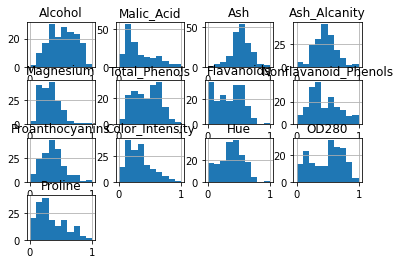

In [14]:
file.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x20f18dd43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f18dd4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f18dc3f10>],
 'medians': [<matplotlib.lines.Line2D at 0x20f18dde190>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f18dde520>],
 'means': []}

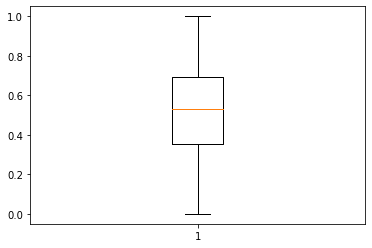

In [15]:
plt.boxplot(file["Alcohol"])

# 1) Agglomerative Hierarchical Clustering Algorithm

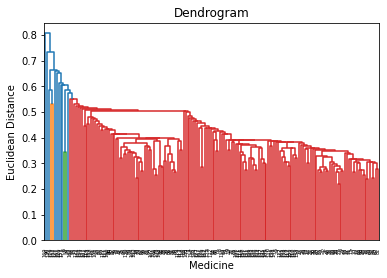

In [16]:
# show the Dendrogram(show step by step clustring formation
data1=file
dgr = dg.dendrogram(dg.linkage(data1,method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Medicine')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
#Create the Agglomerative single Clustering Model with 50 clusters
cluster_model = AgglomerativeClustering(n_clusters =50,affinity = 'euclidean',linkage = 'single')
cluster_Hierarchical=cluster_model.fit_predict(data1)
cluster_Hierarchical

array([ 0, 26,  0,  0, 41,  0,  1,  0,  0,  0,  0,  2,  0,  0,  5, 43,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 49,  0,  0, 47,  5,  0,  0,  0,  5,
        0,  0,  0,  0,  5,  0,  0,  5,  5,  0,  0,  0,  5,  0,  5,  0,  0,
        5,  0,  0,  5, 31,  5,  0,  1,  5,  2, 28,  5,  0,  5, 42,  5,  0,
        0,  0,  5,  0,  2,  5,  0,  5,  5,  0,  5, 45, 36,  5,  0,  0,  0,
        0, 44,  5, 27,  0, 25,  5,  2,  5,  5,  5, 46,  0,  5,  5,  5,  5,
        5, 30,  5,  0,  0, 37,  5,  0,  0, 21,  0,  5,  5, 35,  0,  0,  5,
       29, 13,  0, 33,  0, 38, 39,  4, 12,  0,  4,  5,  0, 48, 32, 17,  0,
        0, 20,  0, 34, 22,  0, 40,  5,  0,  0,  0,  0,  0,  0,  0,  0, 19,
        0,  0, 10, 18, 15, 14,  0,  0,  6, 23, 24, 16,  0,  0,  9,  0,  8,
       11,  0,  7,  3], dtype=int64)

In [18]:
#Assign the clusters to the data
data1["Cluster"]=cluster_Hierarchical
pd.DataFrame(data1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,0
1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969,26
2,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,0
3,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136,0
4,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.139474,0.258893,1.000000,0.922680,0.532609,0.758621,1.000000,0.641509,0.460568,0.402730,0.365854,0.886447,0.133381,8
176,0.113158,0.592885,0.245989,0.458763,0.402174,0.758621,0.472574,0.207547,1.000000,0.138225,0.219512,0.564103,0.202568,11
177,0.110526,0.328063,0.566845,0.484536,0.282609,0.662069,0.516878,0.358491,0.447950,0.168089,0.260163,0.776557,0.247504,0
178,0.100000,0.000000,0.609626,0.536082,0.195652,0.517241,0.352321,0.547170,0.324921,0.153584,0.504065,0.380952,0.111270,7


(array([92., 42.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

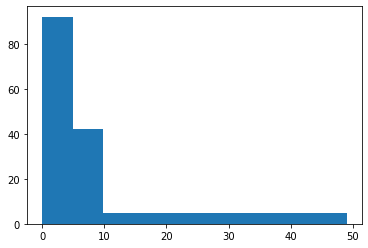

In [19]:
plt.hist(cluster_Hierarchical)

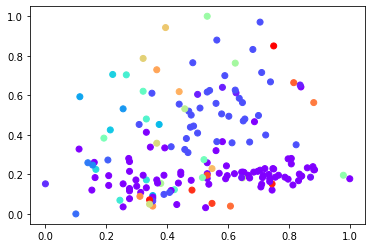

In [20]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1], c=cluster_Hierarchical, cmap='rainbow')

# 2) K-Medoids Clustering Algorithm 

In [21]:
data2 =file
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,0
1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969,26
2,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,0
3,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136,0
4,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341,41


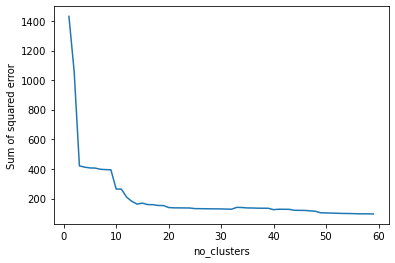

In [22]:
# plot the change of the error respect to number of clusters
list = []
k = range(1,60)
for i in k:
    km = KMedoids(n_clusters=i, max_iter= 1000, random_state=1)
    km.fit(data2)
    list.append(km.inertia_)
plt.xlabel('no_clusters')
plt.ylabel('Sum of squared error')
plt.plot(k,list)

In [23]:
##### Apply the K-Medoids algorithm
kmed = KMedoids(n_clusters=50, max_iter=1000, random_state=1,metric="manhattan")

#Fit the kmedo function on the scaled data
kmed.fit(data2)
cluster_Medoids=kmed.predict(data2)

cluster_Medoids

array([25,  9, 25, 37, 44, 36, 37, 49, 36, 36, 36, 37, 32, 32, 14, 44, 30,
       37, 37, 22, 36, 25, 37, 11, 11, 44, 46, 11, 44, 14, 49, 35, 36, 14,
       32, 35, 36, 32, 14, 11, 43, 14, 14,  0, 20, 32, 14, 32, 14, 36, 37,
       14, 22, 21, 14,  9, 14, 20,  5, 14, 17,  9, 14, 18, 14, 44, 14, 17,
       32, 16, 14, 15, 15, 14, 47, 14, 14, 32, 14, 44, 44, 14, 13, 15, 12,
       11, 44, 14,  9, 28,  9, 14,  8, 14, 14, 14, 44,  8, 14, 14, 14, 14,
       14,  9, 14,  6,  5, 44, 14,  5,  4, 19, 24, 14, 14, 44,  3,  2, 14,
        9, 19, 23,  9,  1, 44, 44, 14, 19, 48, 14, 14,  7, 44,  9, 19, 45,
       28, 19, 10,  9,  9, 31, 44, 14, 42, 42, 42, 26, 29, 27, 26, 34, 19,
        4, 39, 19, 19, 19, 19, 40, 41, 14,  9,  9, 19, 42, 38, 19, 33, 14,
       19, 33, 14, 42], dtype=int64)

In [24]:
#Assign the clusters to the data
data2["Cluster"]=cluster_Medoids
pd.DataFrame(data2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076,25
1,0.978947,0.195652,0.550802,0.041237,0.228261,0.731034,0.706751,0.566038,0.757098,0.351536,0.626016,0.534799,0.621969,9
2,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826,25
3,0.881579,0.223320,0.545455,0.072165,0.347826,0.800000,0.696203,0.301887,0.804416,0.530717,0.585366,0.633700,0.905136,37
4,0.881579,0.563241,0.491979,0.278351,0.347826,0.782759,0.597046,0.264151,0.561514,0.308874,0.455285,0.794872,0.561341,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.139474,0.258893,1.000000,0.922680,0.532609,0.758621,1.000000,0.641509,0.460568,0.402730,0.365854,0.886447,0.133381,14
176,0.113158,0.592885,0.245989,0.458763,0.402174,0.758621,0.472574,0.207547,1.000000,0.138225,0.219512,0.564103,0.202568,19
177,0.110526,0.328063,0.566845,0.484536,0.282609,0.662069,0.516878,0.358491,0.447950,0.168089,0.260163,0.776557,0.247504,33
178,0.100000,0.000000,0.609626,0.536082,0.195652,0.517241,0.352321,0.547170,0.324921,0.153584,0.504065,0.380952,0.111270,14


(array([ 6., 20., 51., 20.,  7.,  9., 13., 19., 23.,  6.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

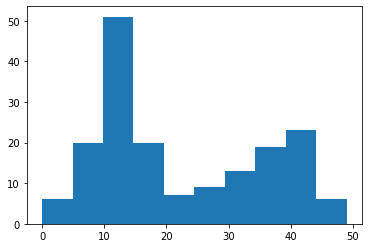

In [25]:
#Histogram to represent of each cluster 
plt.hist(cluster_Medoids)

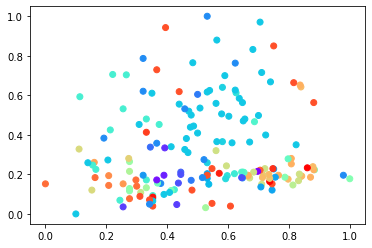

In [26]:
plt.scatter(data2.iloc[:,0],data2.iloc[:,1], c=cluster_Medoids, cmap='rainbow')

# 3) naïve Bayes

#  <font color='red'>Read File</font>

In [27]:
file2 =pd.read_csv("glass_label.csv")
file2.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
1,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.0,7
2,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.0,7
3,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.0,7
4,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.0,6


# <font color='red'>clean file</font>

In [28]:
print(file2.shape)
file2=file2.drop_duplicates()
file2.shape

(212, 10)


(208, 10)

In [29]:
print(file2.isnull().any())
file2.isnull().sum()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [30]:
naive_file=file2
labels = naive_file['Type'].values
data_naive = naive_file.drop(columns=['Type'])

# <font color='red'>Data Normalization</font>

In [31]:
data_naive=normalization(data_naive)
data_naive

Enter 1: use minimax normalization
Enter 2: use scaling normalization
Enter 3: use zscore normalization
Enter 4: non normalization1
enter the maximum number1
enter the minimum number0


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.000000,1.000000,0.000000,0.015576,1.000000,0.000000,0.113383,0.000000,0.000000
1,0.548727,0.760902,0.407572,0.317757,0.110714,0.049919,0.295539,0.533333,0.000000
2,0.172520,0.664662,0.000000,0.610592,0.658929,0.000000,0.270446,0.200000,0.000000
3,0.216857,0.643609,0.000000,0.691589,0.578571,0.008052,0.315985,0.168254,0.000000
4,0.339333,0.640602,0.173719,0.451713,0.480357,0.000000,0.420074,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
207,0.597015,0.108271,0.000000,0.495327,0.425000,0.130435,0.725836,0.000000,0.666667
208,0.679982,0.075188,0.000000,0.149533,0.607143,0.000000,0.859665,0.000000,0.000000
209,0.454785,0.045113,0.380846,0.395639,0.648214,0.093398,0.575279,0.000000,0.000000
210,0.712906,0.043609,0.000000,0.143302,0.583929,0.000000,0.885688,0.000000,0.000000


In [32]:
naive_file=data_naive
naive_file["Type"]=labels

# <font color='red'>Data Visualization</font>

In [33]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 211
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      208 non-null    float64
 1   Na      208 non-null    float64
 2   Mg      208 non-null    float64
 3   Al      208 non-null    float64
 4   Si      208 non-null    float64
 5   K       208 non-null    float64
 6   Ca      208 non-null    float64
 7   Ba      208 non-null    float64
 8   Fe      208 non-null    float64
 9   Type    208 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 17.9 KB


In [34]:
file2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,1.518355,13.401394,2.681490,1.447837,72.647308,0.504135,8.954231,0.177404,0.056875,2.778846
std,0.003052,0.812921,1.444871,0.495414,0.776927,0.658752,1.440575,0.502923,0.098119,2.087259
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516517,12.922500,2.037500,1.190000,72.275000,0.130000,8.227500,0.000000,0.000000,1.000000
50%,1.517670,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519153,13.802500,3.600000,1.630000,73.082500,0.610000,9.142500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

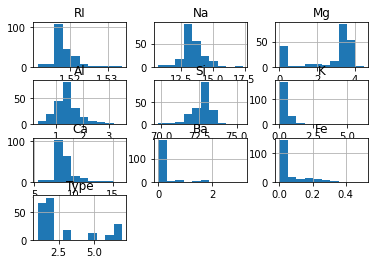

In [35]:
file2.hist()

<AxesSubplot:>

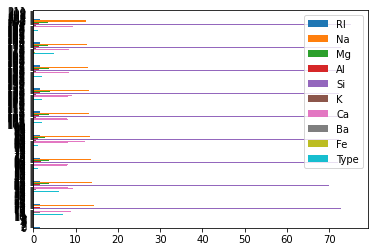

In [36]:
file2.plot.barh()

{'whiskers': [<matplotlib.lines.Line2D at 0x20f1c91f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f1c91faf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f1c91f040>],
 'medians': [<matplotlib.lines.Line2D at 0x20f1c8f8250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f1c8f85e0>],
 'means': []}

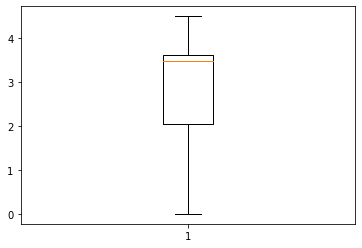

In [37]:
plt.boxplot(file2["Mg"])

In [47]:
#Split the data and label to train and test sets
(x_train,x_test,y_train,y_test)=train_test_split(data_naive,labels,test_size=0.2,random_state=1)

print('x_train shape is ' , x_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (166, 10)
x_test shape is  (42, 10)
y_train shape is  (166,)
y_test shape is  (42,)


In [48]:
#Apply the Naive-Bayes algorithm
bayes=GaussianNB()
#Fit the training data with the training label
bayes_fit=bayes.fit(x_train,y_train)
#predict the test data set
predict=bayes.predict(x_test)
print('Predicted Value for naive bayes is : ' , predict)

Predicted Value for naive bayes is :  [2 2 2 2 2 6 2 2 5 1 6 1 2 2 1 2 7 2 1 5 1 2 7 7 2 2 7 2 1 1 2 1 2 6 1 1 1
 7 1 1 2 5]


In [51]:
#Assign the labels to the tested data
show=pd.DataFrame(x_test)
show["class"]=predict
show

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,class
188,0.225637,0.297744,0.741648,0.373832,0.619643,0.107890,0.261152,0.000000,0.000000,2,2
157,0.240562,0.330827,0.788419,0.414330,0.562500,0.103060,0.241636,0.000000,0.411765,2,2
167,0.209394,0.320301,0.783964,0.570093,0.508929,0.111111,0.236059,0.000000,0.000000,2,2
203,0.275680,0.221053,0.723831,0.271028,0.667857,0.099839,0.322491,0.000000,0.470588,2,2
60,0.308604,0.449624,0.000000,0.084112,0.828571,0.000000,0.516729,0.000000,0.000000,2,2
36,0.351624,0.514286,0.000000,0.560748,0.523214,0.000000,0.506506,0.000000,0.000000,6,6
153,0.305531,0.335338,0.659243,0.355140,0.555357,0.096618,0.312268,0.044444,0.000000,2,2
20,0.485953,0.556391,0.000000,0.221184,0.510714,0.016103,0.565985,0.000000,0.156863,2,2
206,0.463565,0.124812,0.418708,0.395639,0.544643,0.075684,0.555762,0.000000,0.000000,5,5
64,0.431958,0.445113,0.799555,0.258567,0.383929,0.014493,0.368959,0.000000,0.000000,1,1


In [52]:
#Calculate the accuracy
acc=bayes.score(x_train,y_train)
acc=acc*100
print("The accuracy of our naive Bayes model is ",int(acc),"%")

The accuracy of our naive Bayes model is  100 %


(array([13., 18.,  0.,  0.,  0.,  0.,  3.,  0.,  3.,  5.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

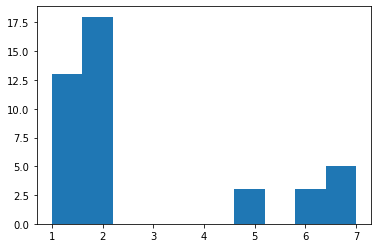

In [53]:
#histogram to show the distribution of the predicted data in the class labels
plt.hist(predict)

{'whiskers': [<matplotlib.lines.Line2D at 0x20f1dd8b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f1dd8bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f1dd8b310>],
 'medians': [<matplotlib.lines.Line2D at 0x20f1dd96520>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f1dd96730>],
 'means': []}

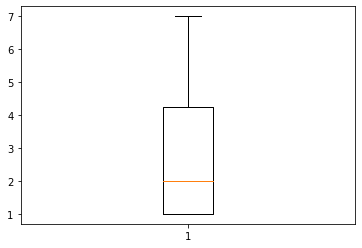

In [54]:
# Box plot for the predicted data labels
plt.boxplot(predict)

Confusion Matrix is : 
 [[13  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  5]]


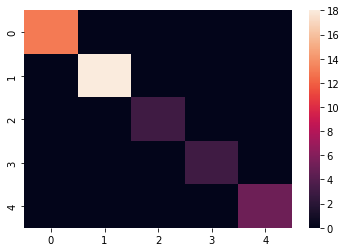

In [55]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM)
plt.show()

# <font color='red'>Comparison Between The 2 Clustring Algorithm</font>

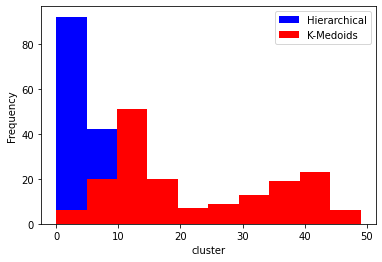

In [56]:
#histogram to show the frequently of each cluster 
plt.hist(cluster_Hierarchical,color="blue")
plt.hist(cluster_Medoids,color="red")
plt.xlabel("cluster")
plt.ylabel("Frequency")
plt.legend(labels=['Hierarchical', 'K-Medoids'])

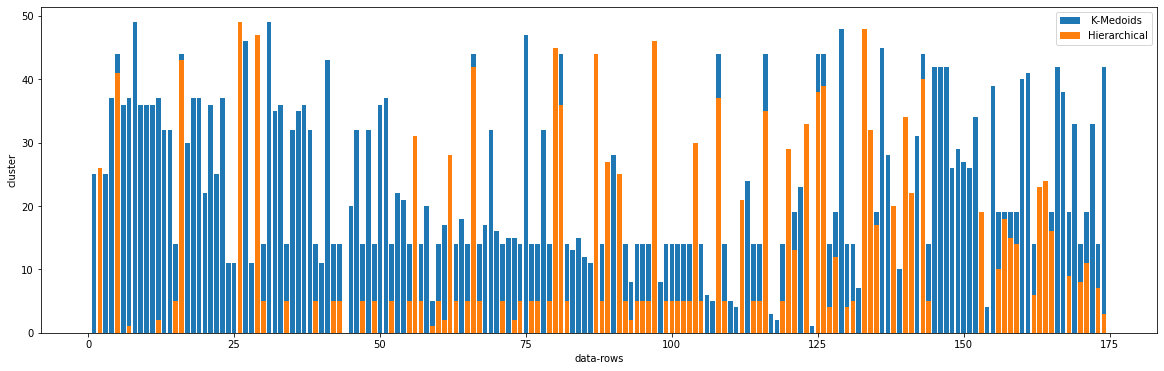

In [57]:
# Bar plot show the cluster of each row of data
plt.figure(figsize=(20,6))
plt.bar(np.arange(1,175,1),cluster_Medoids)
plt.bar(np.arange(1,175,1),cluster_Hierarchical)
plt.xlabel("data-rows")
plt.ylabel("cluster")
plt.legend(labels=[' K-Medoids', 'Hierarchical'])